In [1]:
# For Loading and Manipulating data
import pandas as pd
import numpy as np

# To display all the columns and the rows ( regardless of their number or their width )
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# For visualization purposes
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# To change the style of the plots ( so that we all can see the same thing :) )
plt.style.use('seaborn')

In [3]:
iris = pd.read_csv('Iris.csv')

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.duplicated().sum()

0

In [7]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

> The Data is very clean.

<font color='green'>
<h1><center> Now It's time for some exploration </center></h1>

In [57]:
# Helping Function
def CountPlot(data, x, hue=None, ax=None):
    # Main plot
    ax = sns.countplot(data=data, x=x, ax=ax, hue=hue)
    
    # Looping over each column
    for patch in ax.patches:
        loc    = patch.get_x()
        height = patch.get_height()
        width  = patch.get_width()
        
        ax.text(loc+width/2, 1.01*height, str(height), weight='bold', ha="center", fontsize=15)
    
    # Adding title
    ax.set_title(f'{x} distribution', fontsize=20, color='brown')
    
    # Before editing the ticks we need to draw the plot first
    plt.draw()
    
    # Editing axes labels and ticks
    ax.set_xlabel(x, fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)
        
    ax.set_ylabel('Number of Flowers', fontsize=15)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=13)
    
    
    # Adding legend
    if hue:
        ax.legend(labels=list(data[hue].unique()),  prop={"size":20}, frameon=True, shadow=True);
        
#==========================================================================================================================#
def ScatterPlot(data, x, y, ax=None, hue=None):
    # Main plot
    ax = sns.scatterplot(data=data, x=x, y=y, ax=ax, hue=hue)
        
    # Before editing the ticks we need to draw the plot first
    plt.draw()
    
    # Editing axes labels and ticks
    ax.set_xlabel(x, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
        
    ax.set_ylabel(y, fontsize=20)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)

<font color='blue'>
<h1><center> Univariate EDA </center></h1>

## Q1: What is the distribution of Species in the dataset?

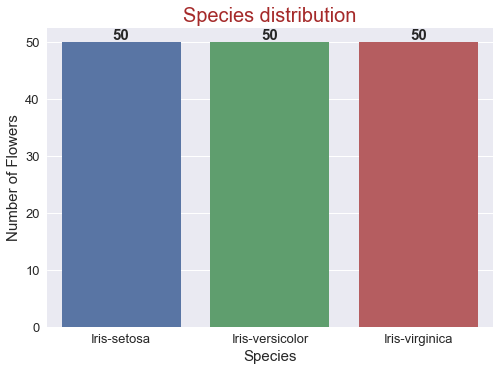

In [10]:
CountPlot(iris, 'Species')

> WoW, Even Balanced data. that's My lucky day :).

<font color='blue'>
<h1><center> Bivariate EDA </center></h1>

## Q2: What is the distribution of Sepal Length for each species?

                SepalLengthCm                                            
                        count   mean       std  min    25%  50%  75%  max
Species                                                                  
Iris-setosa              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8
Iris-versicolor          50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0
Iris-virginica           50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9


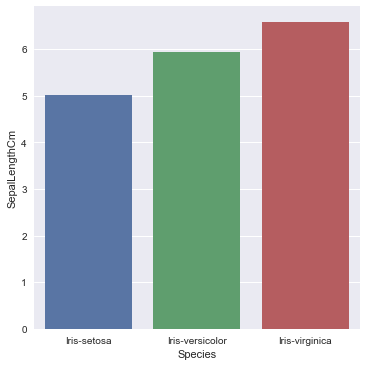

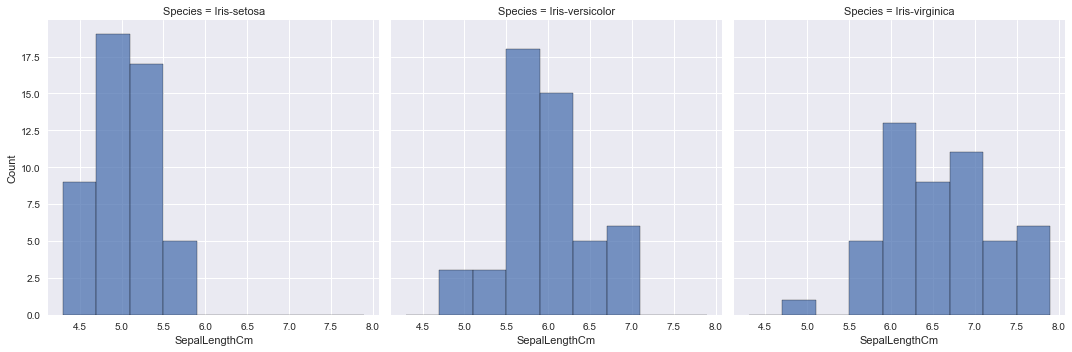

In [27]:
print(iris.iloc[:, [1, -1]].groupby('Species').describe())

sns.catplot(data=iris, y="SepalLengthCm", x="Species", kind='bar', ci=None)

sns.displot(data=iris, x="SepalLengthCm", col="Species");

> As we can see:
- The Average Sepal Length (ASP): ASP_setosa < ASP_versicolor < ASP_virginica
- The standard deviation (SD): SD_setosa < SD_versicolor < SD_virginica

> So when i see a long sepal it's more likely to be virginica. 

## Q3: What is the distribution of Sepal Width for each species?

                SepalWidthCm                                              
                       count   mean       std  min    25%  50%    75%  max
Species                                                                   
Iris-setosa             50.0  3.418  0.381024  2.3  3.125  3.4  3.675  4.4
Iris-versicolor         50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4
Iris-virginica          50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8


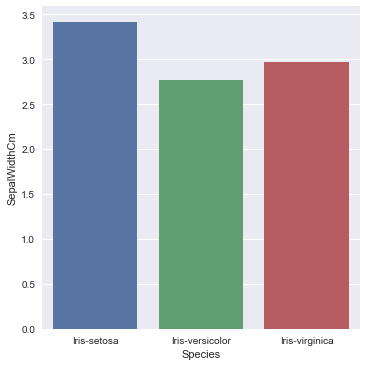

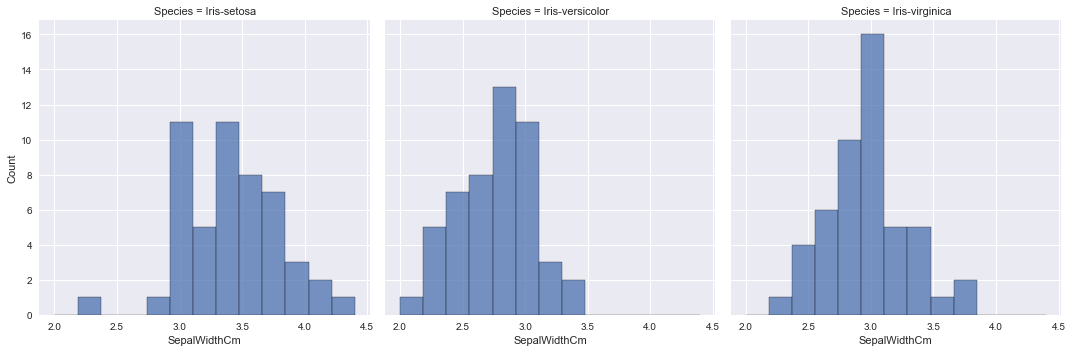

In [28]:
print(iris.iloc[:, [2, -1]].groupby('Species').describe())

sns.catplot(data=iris, y="SepalWidthCm", x="Species", kind='bar', ci=None)

sns.displot(data=iris, x="SepalWidthCm", col="Species");

> As we can see:
- The Average Sepal Length (ASP):  ASP_versicolor < ASP_virginica < ASP_setosa
- The standard deviation (SD): SD_versicolor < SD_virginica < SD_setosa

> So when i see a wide sepal it's more likely to be setosa. 

## Q4: What is the distribution of Petal Length for each species?

                PetalLengthCm                                             
                        count   mean       std  min  25%   50%    75%  max
Species                                                                   
Iris-setosa              50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9
Iris-versicolor          50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
Iris-virginica           50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9


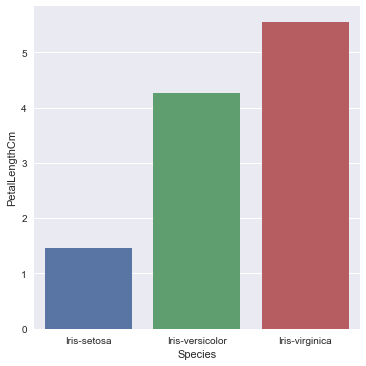

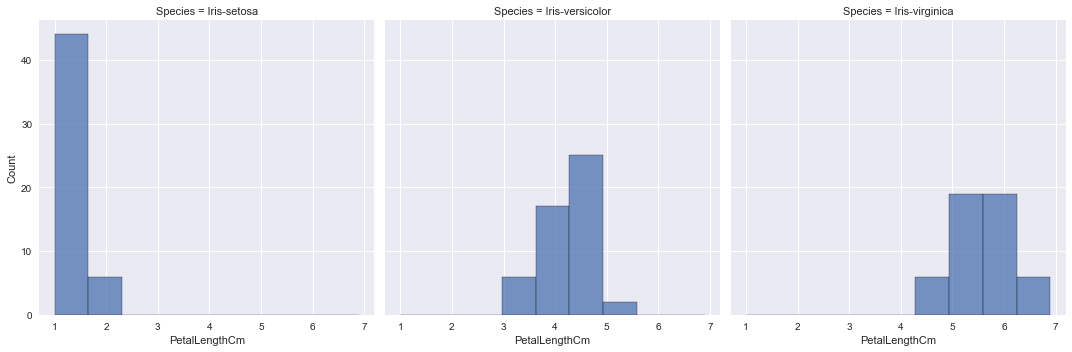

In [29]:
print(iris.iloc[:, [3, -1]].groupby('Species').describe())

sns.catplot(data=iris, y="PetalLengthCm", x="Species", kind='bar', ci=None)

sns.displot(data=iris, x="PetalLengthCm", col="Species");

> As we can see:
- The Average Petal Length (ASP): ASP_setosa < ASP_versicolor < ASP_virginica
- The standard deviation (SD): SD_setosa < SD_versicolor < SD_virginica

> So when i see a short petal it's more likely to be setosa. 

## Q5: What is the distribution of Petal Width for each species?

                PetalWidthCm                                          
                       count   mean       std  min  25%  50%  75%  max
Species                                                               
Iris-setosa             50.0  0.244  0.107210  0.1  0.2  0.2  0.3  0.6
Iris-versicolor         50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8
Iris-virginica          50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5


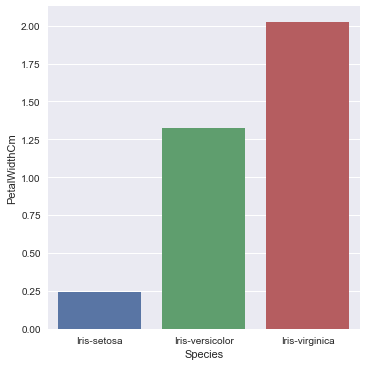

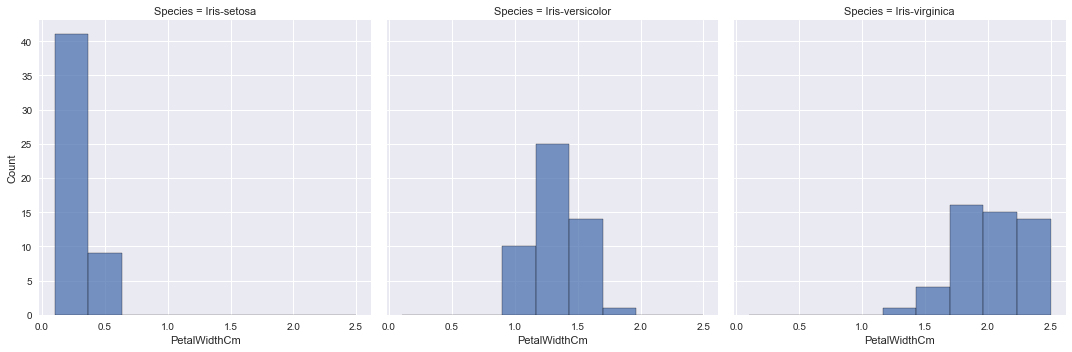

In [30]:
print(iris.iloc[:, [4, -1]].groupby('Species').describe())

sns.catplot(data=iris, y="PetalWidthCm", x="Species", kind='bar', ci=None)

sns.displot(data=iris, x="PetalWidthCm", col="Species");

> As we can see:
- The Average Petal Length (ASP): ASP_setosa < ASP_versicolor < ASP_virginica
- The standard deviation (SD): SD_setosa < SD_versicolor < SD_virginica

> So when i see a narrow petal it's more likely to be setosa. 

<font color='blue'>
<h1><center> Multivariate EDA </center></h1>

## Q6: Sepal Dimensions for each Species.

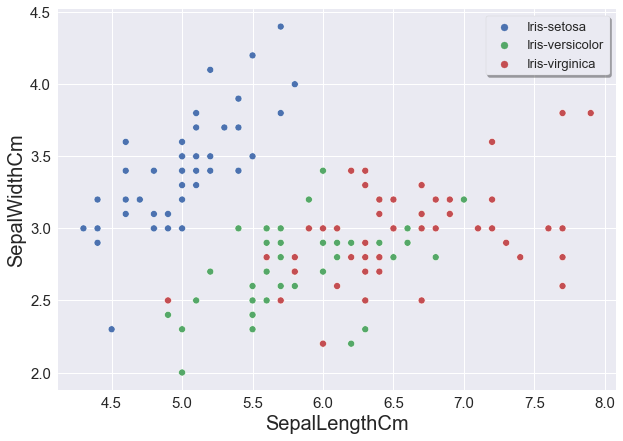

In [58]:
plt.figure(figsize=(10,7))
ScatterPlot(iris, 'SepalLengthCm', 'SepalWidthCm', hue='Species')
plt.legend(prop={"size":13}, frameon=True, shadow=True);

> From the above plot we can see the following:
- Iris-setosa has a relatively short and wide sepals.
- Iris-versicolor has a relatively short and narrow sepals
- Iris-virginica has a relatively long and narrow sepals

## Q6: Petal Dimensions for each Species.

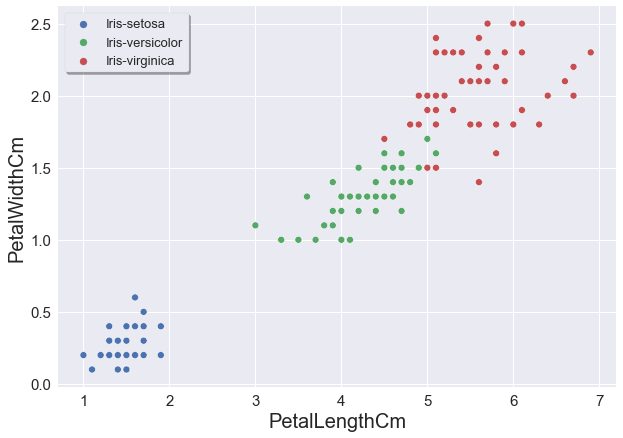

In [59]:
plt.figure(figsize=(10,7))
ScatterPlot(iris, 'PetalLengthCm', 'PetalWidthCm', hue='Species')
plt.legend(prop={"size":13}, frameon=True, shadow=True);

> WoW this feature is a very good feature for clustering the species:
- Iris-setosa has approximately a petal length ( 1cm to 2cm ) and a petal width ( 0cm to 0.6cm )
- Iris-versicolor has approximately a petal length ( 3cm to 5cm ) and a petal width ( 1cm to 1.7cm )
- Iris-virginica has approximately a petal length ( 5cm to 7cm ) and a petal width ( 1.7cm to 2.5cm )

Done :)